### bibliotecas

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### importação dos dados

In [3]:
path = r"D:\UFPR\2º Semestre 2021\Estatística Econômica e Introdução à Econometria\1. Relatório Enade\2018\3.DADOS\microdados_enade_2018.txt"
enade = pd.read_table(path, sep=';', decimal=',')

### Amostragem e Tratamento

#### Variáveis Selecionadas

In [368]:
economia = enade.where(enade.CO_GRUPO==13).filter([
    'QE_I04',               # Nível de educação do pai
    'QE_I05',               # Nível de educação da mãe
    'QE_I07',               # Quantas pessoas moram com você
    'QE_I08',               # Renda familiar total
    'QE_I09',               # Situação responsável (responsável pela renda)
    'QE_I10',               # horas de trabalho na semana
    'QE_I23',               # Horas por semana dedicada ao estudo
    'NT_GER'                # Nota Geral
]).dropna()

#### Transformação de variáveis categóricas para numéricas

In [369]:
dict_escolaridade_pais = {
"A": 0,
"B": 1,
"C": 2,
"D": 3,
"E": 4,
"F": 5
}

In [370]:
economia['QE_I04'] = [dict_escolaridade_pais[resp] for resp in economia.QE_I04] #substitui os valores pelo nome da regiao

In [371]:
economia['QE_I05'] = [dict_escolaridade_pais[resp] for resp in economia.QE_I05] #substitui os valores pelo nome da regiao

In [372]:
dict_pessoas_moram = {
    "A": 1,
    "B": 2,
    "C": 3,
    "D": 4,
    "E": 5,
    "F": 6,
    "G": 7,
    "H": 8,
}

In [373]:
economia['QE_I07'] = [dict_pessoas_moram[resp] for resp in economia.QE_I07] #substitui as letras pelo numero de pessoas

In [374]:
dict_renda_familiar = {
    "A": 1500,
    "B": 2250,
    "C": 3750,
    "D": 5250,
    "E": 8000,
    "F": 20000,
    "G": 30000,
}

In [375]:
economia['QE_I08'] = [dict_renda_familiar[resp] for resp in economia.QE_I08] #substitui as letras pelo salário médio da faixa correspondente

In [376]:
dict_responsavel_renda = {
    "A": 0,
    "B": 1,
    "C": 2,
    "D": 3,
    "E": 4,
    "F": 5
}

In [377]:
economia['QE_I09'] = [dict_responsavel_renda[resp] for resp in economia.QE_I09] #substitui as letras pelo situação financeira da faixa correspondente

In [378]:
dict_horas_trabalho = {
    "A": 0,
    "B": 10,
    "C": 20,
    "D": 30,
    "E": 40,
}

In [379]:
economia['QE_I10'] = [dict_horas_trabalho[resp] for resp in economia.QE_I10] #substitui as letras pelo número de ho

In [380]:
dict_horas_estudo = {
    "A": 0,
    "B": 2,
    "C": 5,
    "D": 10,
    "E": 12,
}

In [381]:
economia['QE_I23'] = [dict_horas_estudo[resp] for resp in economia.QE_I23] #substitui as letras pelo número de horas de estudo médio

In [382]:
enade1 = pd.DataFrame(enade['QE_I23'].dropna())

In [383]:
enade1

,QE_I23
0,B
1,C
2,D
3,E
4,B
...,...
548115,B
548117,C
548120,C
548121,A


In [384]:
enade1['QE_I23'] = [dict_horas_estudo[resp] for resp in enade1.QE_I23] #substitui as letras pelo número de horas de estudo médio

In [385]:
economia

,QE_I04,QE_I05,QE_I07,QE_I08,QE_I09,QE_I10,QE_I23,NT_GER
160,3,3,3,3750,5,40,5,24.9
161,3,1,3,5250,4,40,2,25.6
162,3,3,3,3750,2,40,5,48.7
163,1,2,4,2250,4,40,2,35.7
164,1,3,2,2250,4,40,5,33.9
...,...,...,...,...,...,...,...,...
546659,4,4,6,20000,4,40,2,40.9
547633,3,4,2,1500,1,0,2,32.2
547634,4,3,2,3750,3,20,10,27.8
547635,0,2,3,1500,5,30,2,30.2


## Matriz de Correlação

In [19]:
dummies_ensino = pd.get_dummies(economia.QE_I17)
dummies_ensino

AttributeError: 'DataFrame' object has no attribute 'QE_I17'

In [20]:
dummies_ensino = pd.concat([economia['NT_GER'], dummies_ensino], axis=1)

NameError: name 'dummies_ensino' is not defined

In [ ]:
dummies = pd.get_dummies(economia, 
    columns=[
        'QE_I04',
        'QE_I05',
        'QE_I07',
        'QE_I08',
        'QE_I09',
        'QE_I10',
        'QE_I23',
        ])

In [ ]:
dummies = pd.concat([economia['NT_GER'], dummies], axis=1)

In [ ]:
correlacao = dummies_ensino.corr()

In [ ]:
economia['renda_media'] = economia['QE_I08'] / economia['QE_I07']

<AxesSubplot:>

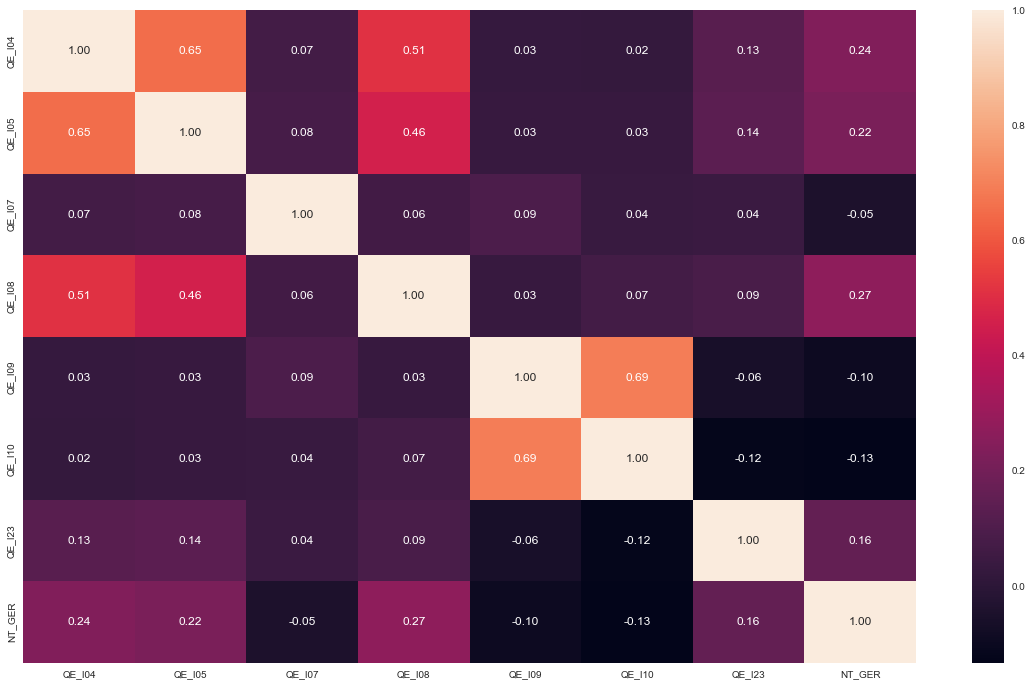

In [180]:
plt.figure(figsize=(20, 12))
sns.heatmap(economia.corr(), annot = True, fmt=".2f")

#### Exportar dados

In [ ]:
economia.to_excel(r'D:\UFPR\2º Semestre 2021\Estatística Econômica e Introdução à Econometria\10. Décimo Relatório\economia_variaveis_tratadas.xlsx', header=True, index=False)

---

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
pd.set_option('display.max_columns', 500)
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

from scipy.stats import kurtosis
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.graphics.gofplots import qqplot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import het_breuschpagan, het_goldfeldquandt,het_white
from statsmodels.stats.diagnostic import linear_harvey_collier, linear_reset, spec_white
from statsmodels.stats.diagnostic import linear_rainbow
from statsmodels.graphics.regressionplots import plot_leverage_resid2
from yellowbrick.regressor import CooksDistance
from statsmodels.stats.outliers_influence import OLSInfluence, variance_inflation_factor 
from sklearn.linear_model import LinearRegression

Colunas
        - 'QE_I04',  # Nível de educação do pai
        - 'QE_I05',  # Nível de educação da mãe
        - 'QE_I07',  # Quantas pessoas moram com você
        - 'QE_I08',  # Renda familiar total
        - 'QE_I09',  # Situação responsável (responsável pela renda)
        - 'QE_I10',  # horas de trabalho na semana
        - 'QE_I23',  # Horas por semana dedicada ao estudo
        - 'NT_GER'   # Nota Geral

In [328]:
economia1 = pd.DataFrame(economia['QE_I23'])

In [349]:
enade1.value_counts()

QE_I23
2         228068
5         132818
10         46075
0          42051
12         36497
dtype: int64

In [330]:
enade1.QE_I23 = pd.Categorical(enade1.QE_I23, categories=['0', '2', '5', '10', '12'], ordered=True)
economia1.QE_I23 = pd.Categorical(economia1.QE_I23, categories=['0', '2', '5', '10', '12'], ordered=True)

In [331]:
enadeQ23Prop = pd.DataFrame(enade1['QE_I23'].value_counts() / enade1['QE_I23'].count(), dtype='category')
economiaQ23Prop = pd.DataFrame(economia1['QE_I23'].value_counts() / economia1['QE_I23'].count(), dtype='category')

In [361]:
enadeQ23Prop.sort_index()

,QE_I23
0,0.086612
2,0.469750
5,0.273564
10,0.094900
12,0.075173


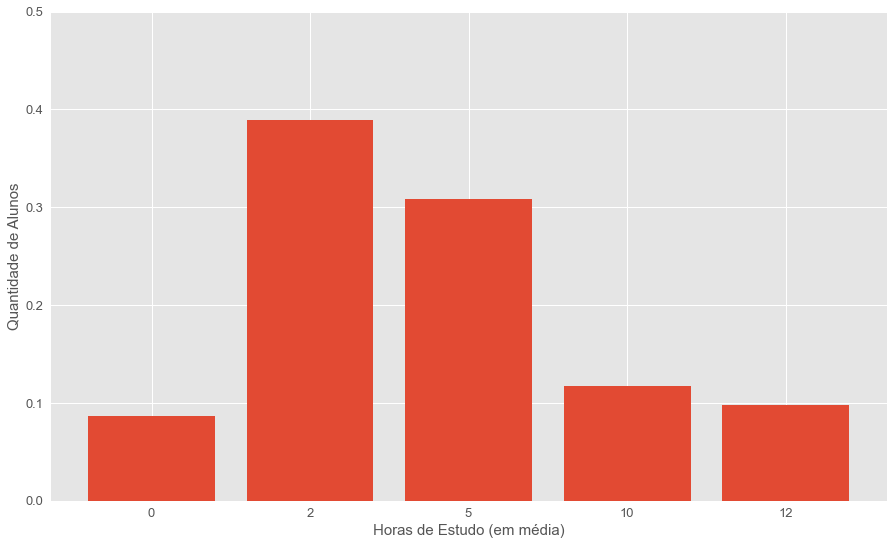

In [362]:
plt.style.use('ggplot')
plt.figure(figsize=(15,9))
plt.bar(economiaQ23Prop.sort_index().index, economiaQ23Prop['QE_I23'].sort_index().values)
#plt.title('Quantidade de alunos por hora de estudo', size=20)
plt.xticks(size=13)
plt.yticks(size=13)
plt.ylim(0, 0.5)
plt.xlabel('Horas de Estudo (em média)', size=15)
plt.ylabel('Quantidade de Alunos', size=15);
plt.savefig('D:/UFPR/2º Semestre 2021/Estatística Econômica e Introdução à Econometria/10. Décimo Relatório/quantidade_de_alunos_por_hora_de_estudo_economia.png')

In [327]:
economia['QE_I23'].value_counts()

2     3126
5     2476
10     943
12     783
0      696
Name: QE_I23, dtype: int64

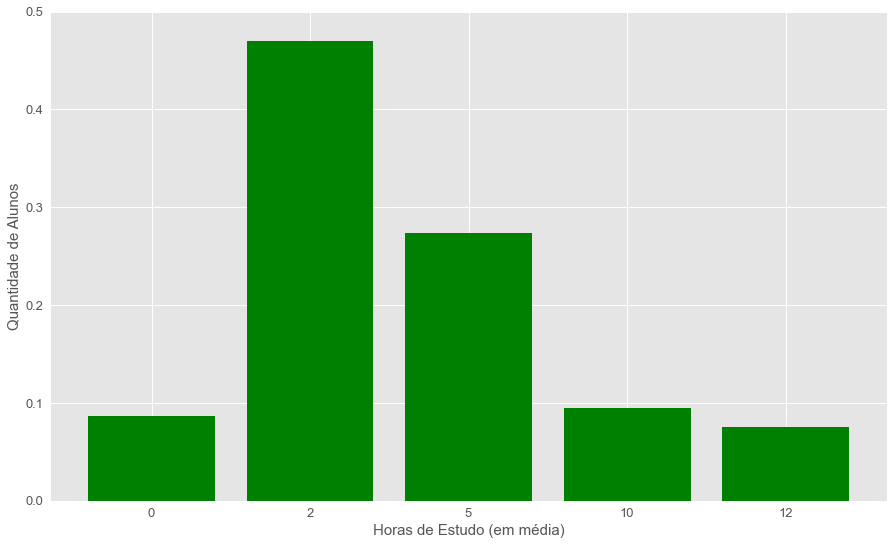

In [357]:
plt.style.use('ggplot')
plt.figure(figsize=(15,9))
plt.bar(enadeQ23Prop.sort_index().index, enadeQ23Prop['QE_I23'].sort_index().values, color='green')
plt.xticks(size=13)
plt.yticks(size=13)
plt.ylim(0, 0.5)
plt.xlabel('Horas de Estudo (em média)', size=15)
plt.ylabel('Quantidade de Alunos', size=15);
plt.savefig('D:/UFPR/2º Semestre 2021/Estatística Econômica e Introdução à Econometria/10. Décimo Relatório/quantidade_de_alunos_por_hora_de_estudo.png')

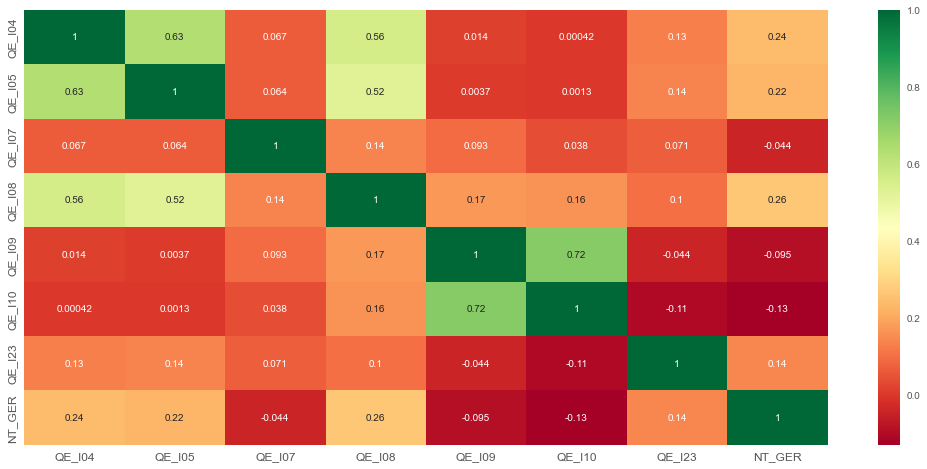

In [391]:
plt.figure(figsize=(18,8))
sns.heatmap(economia.corr('spearman'), annot = True, cmap= "RdYlGn");
plt.xticks(size=12);
plt.yticks(size=12);
#plt.title('Correlação de spearman',size=15);
plt.savefig('D:/UFPR/2º Semestre 2021/Estatística Econômica e Introdução à Econometria/10. Décimo Relatório/correlacao_spearman_economia.png')

In [125]:
economia[['QE_I04','QE_I05','QE_I07','QE_I09','QE_I23']].plot.box(figsize=(20,6));

KeyError: "['QE_I04', 'QE_I09'] not in index"

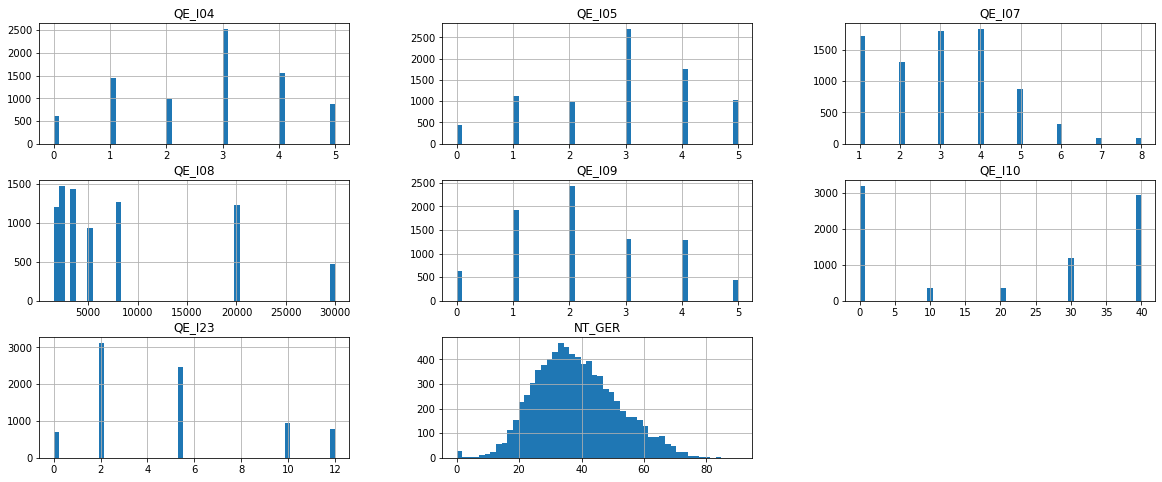

In [ ]:
economia[['QE_I04','QE_I05','QE_I07','QE_I08', 'QE_I09','QE_I10','QE_I23','NT_GER']].hist(figsize=(20,8), bins=50);

In [ ]:
X = economia.drop(['NT_GER'], axis=1)
y = economia['NT_GER']

In [126]:
modelo1 = (sm.OLS(y,sm.add_constant(X)).fit())
modelo1.summary(title='Sumário do modelo com intercepto')

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Sumário do modelo com intercepto                       
==============================================================================
Dep. Variable:                 NT_GER   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     166.3
Date:                Sun, 10 Apr 2022   Prob (F-statistic):          1.57e-230
Time:                        17:13:05   Log-Likelihood:                -31501.
No. Observations:                8024   AIC:                         6.302e+04
Df Residuals:                    8016   BIC:                         6.307e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.9470      0.482     70.470      0.000      33.003      34.891
QE_I04         0.7866      0.132      5.943      0.000       0.527       1.046
QE_I05         0.6219      0.134      4.635      0.000       0.359       0.885
QE_I07        -0.5890      0.088     -6.726      0.000      -0.761      -0.417
QE_I08         0.0003   1.99e-05     16.157      0.000       0.000       0.000
QE_I09        -0.0232      0.142     -0.163      0.870      -0.302       0.256
QE_I10        -0.0975      0.011     -9.184      0.000      -0.118      -0.077
QE_I23         0.3775      0.038      9.895      0.000       0.303       0.452
==============================================================================
Omnibus:                       32.176   Durbin-Watson:                   1.761
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.529
Skew:                           0.155   Prob(JB):                     8.64e-08
Kurtosis:                       2.963   Cond. No.                     4.07e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [127]:
modelo2 = sm.OLS(y,X).fit()
modelo2.summary(title='Sumário do modelo sem intercepto')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            Sumário do modelo sem intercepto                           
=======================================================================================
Dep. Variable:                 NT_GER   R-squared (uncentered):                   0.852
Model:                            OLS   Adj. R-squared (uncentered):              0.852
Method:                 Least Squares   F-statistic:                              6602.
Date:                Sun, 10 Apr 2022   Prob (F-statistic):                        0.00
Time:                        17:13:11   Log-Likelihood:                         -33435.
No. Observations:                8024   AIC:                                  6.688e+04
Df Residuals:                    8017   BIC:                                  6.693e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
QE_I04         2.4322      0.166     14.670      0.000       2.107       2.757
QE_I05         3.3776      0.163     20.680      0.000       3.057       3.698
QE_I07         2.2217      0.099     22.394      0.000       2.027       2.416
QE_I08         0.0002   2.53e-05      8.195      0.000       0.000       0.000
QE_I09         2.8823      0.174     16.612      0.000       2.542       3.222
QE_I10        -0.0702      0.014     -5.196      0.000      -0.097      -0.044
QE_I23         1.1861      0.046     25.620      0.000       1.095       1.277
==============================================================================
Omnibus:                      239.153   Durbin-Watson:                   1.817
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.685
Skew:                           0.368   Prob(JB):                     4.58e-64
Kurtosis:                       3.575   Cond. No.                     1.38e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.38e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

---
### Diagnóstico do Modelo

In [128]:
Predicoes = pd.DataFrame(modelo1.predict(), columns=['Predições 1'])
Predicoes['Predições 2'] = modelo2.predict()
Predicoes['NT_GER'] = economia['NT_GER'].values

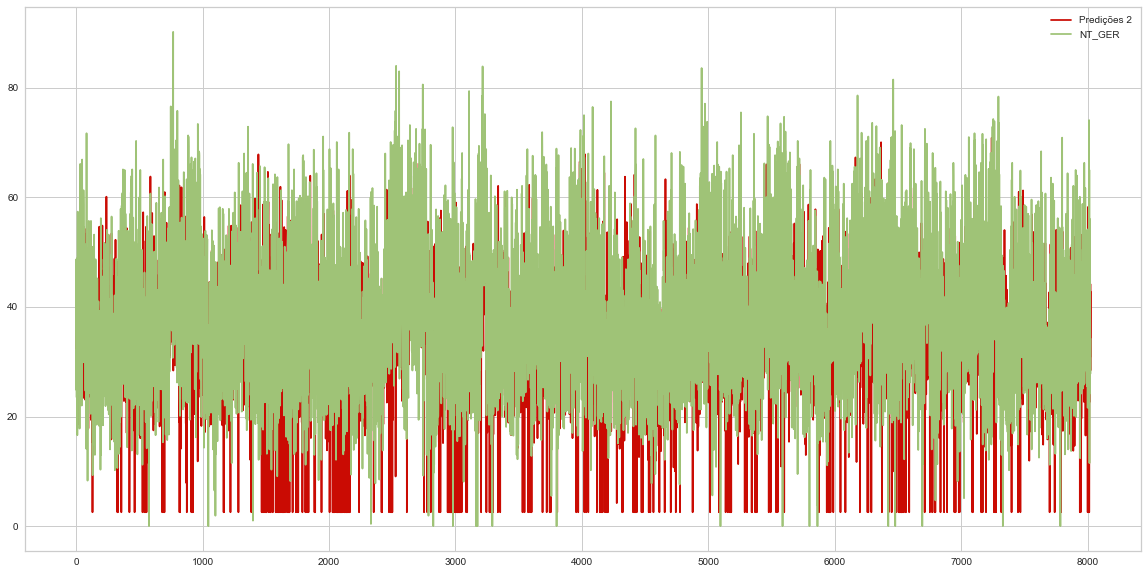

In [129]:
Predicoes[['Predições 2','NT_GER']].plot(figsize=(20,10), color=['r','g']);

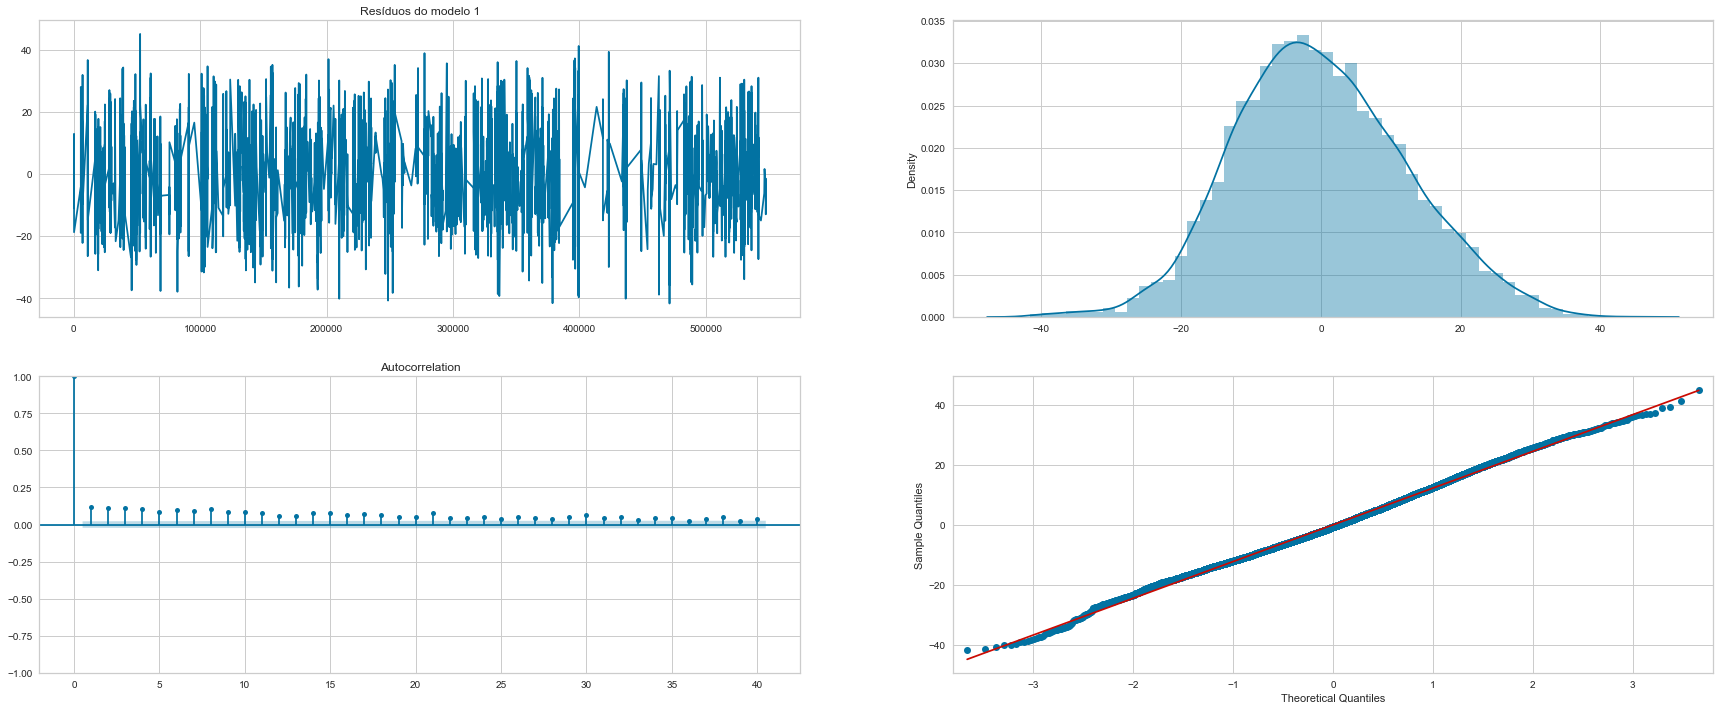

In [130]:
residuos1 = modelo1.resid
fig, ax = plt.subplots(2,2,figsize=(30,12))
residuos1.plot(title="Resíduos do modelo 1", ax=ax[0][0])
sns.distplot(residuos1,ax=ax[0][1])
plot_acf(residuos1,lags=40, ax=ax[1][0])
qqplot(residuos1,line='s', ax=ax[1][1]);

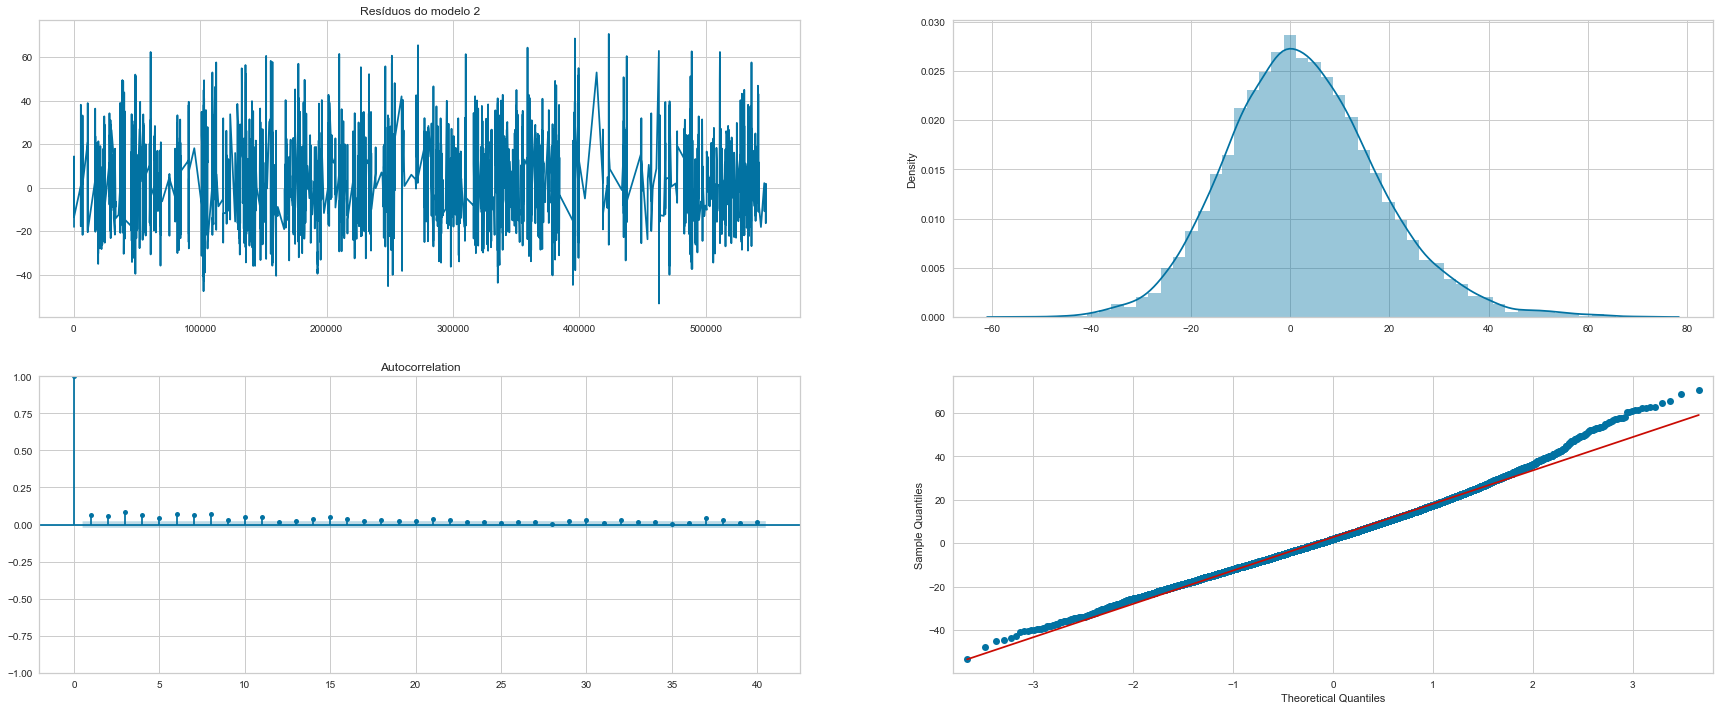

In [131]:
residuos2 = modelo2.resid
fig, ax = plt.subplots(2,2,figsize=(30,12))
residuos2.plot(title="Resíduos do modelo 2", ax=ax[0][0])
sns.distplot(residuos2,ax=ax[0][1])
plot_acf(residuos2,lags=40, ax=ax[1][0])
qqplot(residuos2,line='s', ax=ax[1][1]);

In [132]:
nome = ['Estatística', 'Probabilidade']
teste = sms.omni_normtest(modelo1.resid)
lzip(nome, teste)

[('Estatística', 32.17572688897921), ('Probabilidade', 1.0306938399451406e-07)]

In [133]:
nome2 = ['Estatística', 'Probabilidade']
teste2 = sms.omni_normtest(modelo2.resid)
lzip(nome2, teste2)

[('Estatística', 239.15343823714747),
 ('Probabilidade', 1.1708215912509427e-52)]

In [135]:
#teste de multicolinearidade

print('Número condição do modelo 1 :',np.linalg.cond(modelo1.model.exog))

print('Número condição do modelo 2 :',np.linalg.cond(modelo2.model.exog))

Número condição do modelo 1 : 40722.48457164054
Número condição do modelo 2 : 13795.237926105314


---
### Teste de Heterocesdaticidade

In [137]:
economia2 = economia
economia['residuos1'] = modelo1.resid
economia['residuos2'] = modelo2.resid

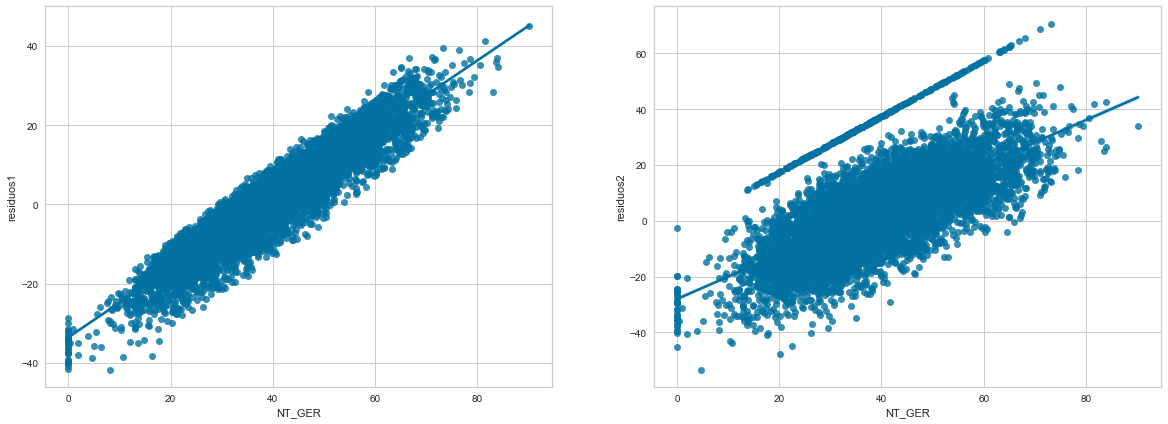

In [140]:
fig, ax = plt.subplots(1,2,figsize=(20,7))
sns.regplot(x='NT_GER',y='residuos1',data=economia2, ax=ax[0])
sns.regplot(x='NT_GER',y='residuos2',data=economia2, ax=ax[1]);

In [142]:
nomes = ['Estatística F','p-valor','Situação da variância']
testeh = het_goldfeldquandt(modelo1.resid, modelo1.model.exog)
lzip(nomes, testeh)

[('Estatística F', 0.9735237125827935),
 ('p-valor', 0.8020302610243623),
 ('Situação da variância', 'increasing')]

In [143]:
nomes = ['Estatística F','p-valor','Situação da variância']
testeh = het_goldfeldquandt(modelo2.resid, modelo2.model.exog)
lzip(nomes, testeh)

[('Estatística F', 0.9250877532440972),
 ('p-valor', 0.993119341657762),
 ('Situação da variância', 'increasing')]

In [144]:
nomes = ['Estatística Multiplicador de Lagrange','p-valor','Estatística F','f p-valor']
for i,j in zip(nomes,het_breuschpagan(modelo1.resid, modelo1.model.exog)):
    print(i,':',j)

Estatística Multiplicador de Lagrange : 115.72333794290803
p-valor : 5.946178691232186e-22
Estatística F : 16.757096332487087
f p-valor : 4.1270313499137187e-22


In [145]:
nomes = ['Estatística Multiplicador de Lagrange','p-valor','Estatística F','f p-valor']
for i,j in zip(nomes,het_breuschpagan(modelo2.resid, modelo2.model.exog)):
    print(i,':',j)

Estatística Multiplicador de Lagrange : 1327.5307463421034
p-valor : 1.1875965285109644e-283
Estatística F : 227.0453191777375
f p-valor : 4.85910885418265e-309


In [146]:
nomes = ['Estatística Multiplicador de Lagrange','p-valor','Estatística F','f p-valor']
for i,j in zip(nomes,het_white(modelo1.resid, modelo1.model.exog)):
    print(i,':',j)

Estatística Multiplicador de Lagrange : 159.45842202244063
p-valor : 8.26149048254072e-18
Estatística F : 4.627474786622553
f p-valor : 5.093650239404325e-18


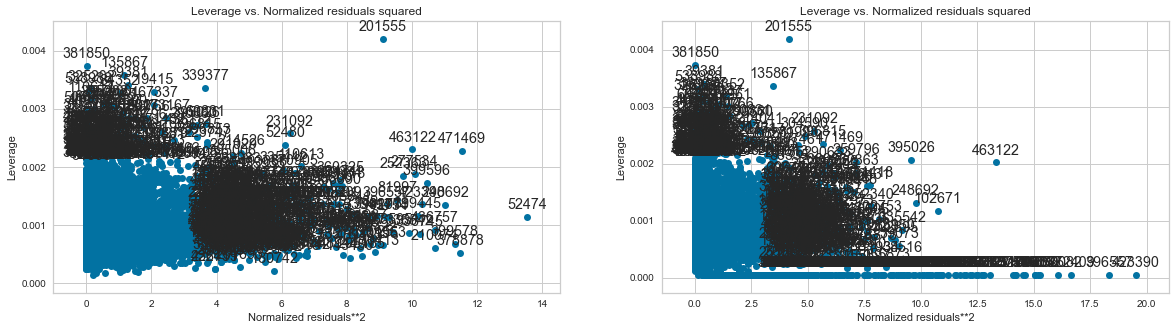

In [147]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
plot_leverage_resid2(modelo1, ax = ax[0])
plot_leverage_resid2(modelo2, ax = ax[1]);

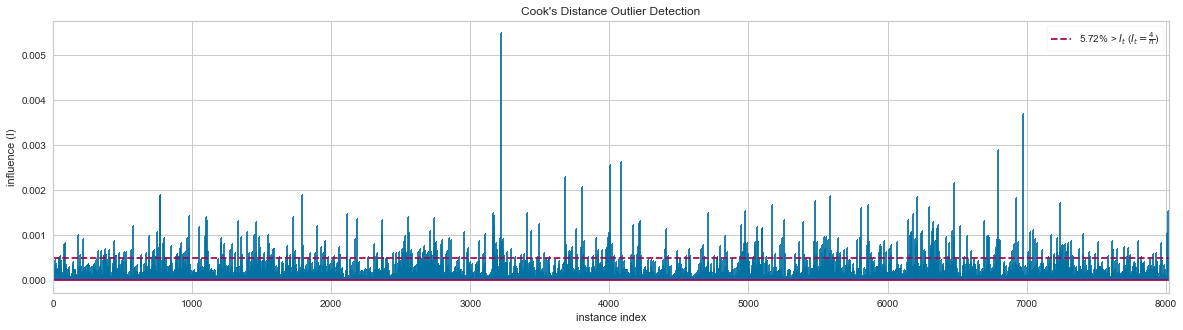

In [148]:
plt.figure(figsize=(20,5))
CooksDistance().fit(X, y).show();

In [152]:
linear_reset(modelo1, power = 3)

<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=0.7773511203405574, p-value=0.6779541896785509, df_denom=2>

In [153]:
linear_reset(modelo2, power = 3)

<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=2385.3603485956546, p-value=0.0, df_denom=2>

In [154]:
nome = ['Estatística do teste', 'p-valor','Graus de liberdade']
lzip(nome,spec_white(modelo1.resid, modelo1.model.exog))
#spec_white(modelo2.resid, modelo2.model.exog)

[('Estatística do teste', 155.48542823756821),
 ('p-valor', 3.9973738963271687e-17),
 ('Graus de liberdade', 35)]

In [155]:
nome = ['Estatística do teste', 'p-valor']
lzip(nome,linear_rainbow(modelo1))

[('Estatística do teste', 1.0375093346585327),
 ('p-valor', 0.12191144982622872)]

In [156]:
nome = ['Estatística do teste', 'p-valor']
lzip(nome,linear_rainbow(modelo2))

[('Estatística do teste', 0.9611470280476927), ('p-valor', 0.8951464518063006)]